# Nearest Neighbor Controller

In [2]:
import numpy as np
import matplotlib as mpl
from MPCNet.dataset import dataset
from MPCNet.controller import neighbor_controller, utils
from MPCNet.simulation import simulation
mpl.rcParams['figure.figsize'] = [10, 10]

In [3]:
X_raw,y = dataset.Dataset.load('data5-3000.csv')

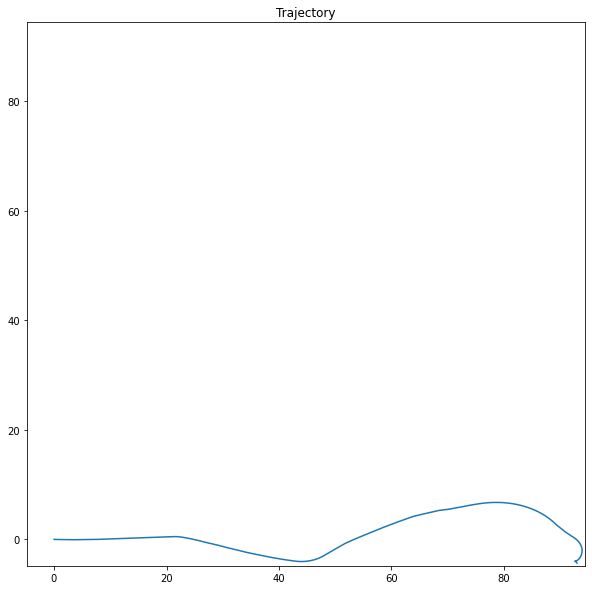

In [4]:
controllerClass = neighbor_controller.NeighborController(X_raw, y)
targetState = np.array([100, 0, 0, 0])

def controller(state):
    return controllerClass.getControl(state.T, targetState.T)

sim = simulation.Simulation(
       np.array([0.0, 0.0, 0.0, 0.0]),
       10.0,
       controller)

sim.runSimulation(30.0, quiet=True)
simulation.plotSimulation(sim)

In [5]:
controllerClass.getControl(np.array([0, 0, 0, 0]).T, np.array([40, 0, 0, 0]).T)

array([-0.16752816,  0.82064427])

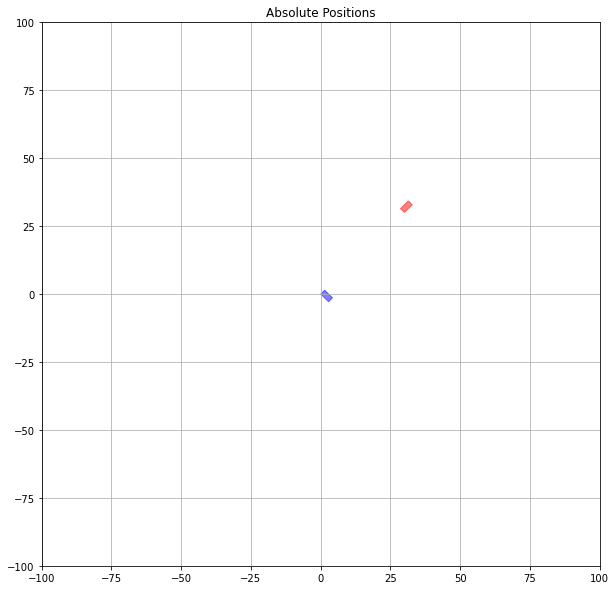

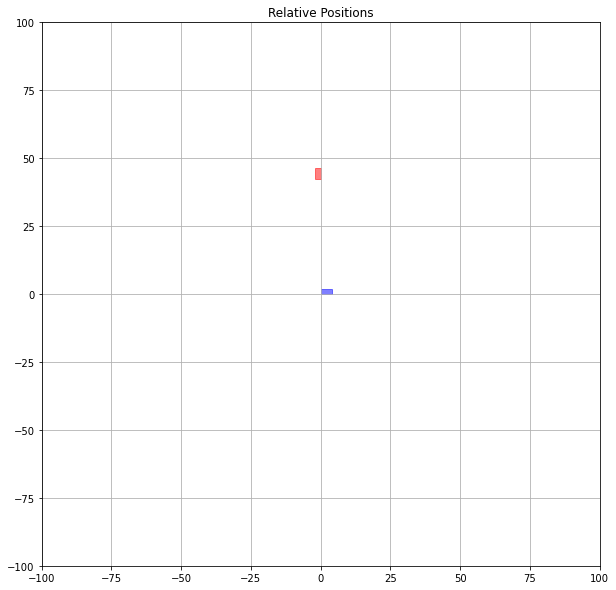

In [6]:
init = np.array([0, 0, 0, -np.pi/4])
final = np.array([30, 30, 10, np.pi/4])
initRelative, finalRelative = utils.absoluteToRelative(init, final)
utils.plotAbsolute(init, final)
utils.plotRelative(initRelative, finalRelative)